<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/%EC%97%90%EC%96%B4%EB%B9%84%EC%97%94%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb

## 데이터 전처리

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

In [ ]:
# 경로로 이동
os.chdir('C:\\Users\\eg287\\OneDrive\\바탕 화면\\airbnb-recruiting-new-user-bookings')

In [ ]:
# 디렉토리 내 파일 확인
os.listdir()

['age_gender_bkts.csv',
 'ATN0026900996.pdf',
 'countries.csv',
 'sample_submission_NDF.csv',
 'sessions.csv',
 'test_users.csv',
 'train_users_2.csv',
 '원본']

In [ ]:
cwd = os.getcwd()

age_gender = pd.read_csv(os.path.join(cwd , 'age_gender_bkts.csv'))
countries = pd.read_csv(os.path.join(cwd , 'countries.csv'))
sessions = pd.read_csv(os.path.join(cwd , 'sessions.csv'))
users = pd.read_csv(os.path.join(cwd , 'train_users_2.csv'))
test = pd.read_csv(os.path.join(cwd,'test_users.csv'))

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [ ]:
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
# datetime으로 바꾸기
users['date_account_created']  = pd.to_datetime(users['date_account_created'])
users['date_first_booking']  = pd.to_datetime(users['date_first_booking'])

time_slice = users['timestamp_first_active'].astype(str)
real_time = time_slice.str[0:4] + '-' + time_slice.str[4:6] + '-' + time_slice.str[6:8] +' '+ time_slice.str[8:10] + ':'+ time_slice.str[10:12] + ':'+time_slice.str[12:14]
users['timestamp_first_active'] = pd.to_datetime(real_time)
users['timestamp_first_active']

0        2009-03-19 04:32:55
1        2009-05-23 17:48:09
2        2009-06-09 23:12:47
3        2009-10-31 06:01:29
4        2009-12-08 06:11:05
                 ...        
213446   2014-06-30 23:56:36
213447   2014-06-30 23:57:19
213448   2014-06-30 23:57:54
213449   2014-06-30 23:58:22
213450   2014-06-30 23:58:24
Name: timestamp_first_active, Length: 213451, dtype: datetime64[ns]

In [ ]:
# unknown은 모두 결측치로 수정
users['gender'].replace('-unknown-',np.NaN, inplace=True)
users['first_device_type'].replace('Other/Unknown',np.NaN, inplace=True)
users['first_browser'].replace('-unknown-',np.NaN, inplace=True)

# 결측치는 0으로 나이는 정수로 변경
users['age'] = users['age'].fillna(-1).astype(int)

<Axes: >

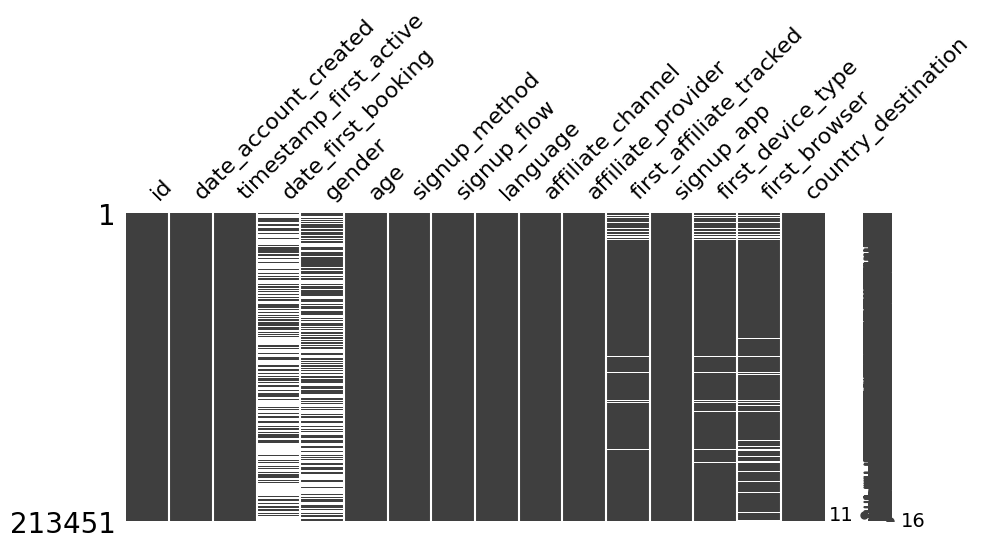

In [ ]:
# 결측치 다시 확인
msno.matrix(users, figsize=(10,4))

In [ ]:
# 로그 수집된 아이디 수 비교
print(f"유저 : {users['id'].nunique()}")
print(f"세션 : {sessions['user_id'].nunique()}")

유저 : 213451
세션 : 135483


In [ ]:
# sessions와 users의 공통 아이디 찾기
inter_id = set(sessions['user_id'].unique()).intersection(set(users['id']))

In [ ]:
# 확인 결과 너무 숫자가 적음
df_users = users[users['id'].isin(inter_id)]
df_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
137021,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
137022,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,NaN,-1,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
137023,4grx6yxeby,2014-01-01,2014-01-01 00:16:39,NaT,NaN,-1,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
137024,ncf87guaf0,2014-01-01,2014-01-01 00:21:46,NaT,NaN,-1,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
137025,4rvqpxoh3h,2014-01-01,2014-01-01 00:26:19,2014-01-02,NaN,-1,basic,25,en,direct,direct,untracked,iOS,iPhone,NaN,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,NaN,-1,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,NaN,32,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,2014-06-30 23:58:22,NaT,NaN,-1,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [ ]:
# 확인 결과 로그데이터의 절반은 test데이터용인 것으로 나타남
diff_id = set(sessions['user_id'].unique()).difference(set(users['id']))
inter_test_id = set(sessions['user_id'].unique()).intersection(set(test['id']))

print(f'users와 sessions값의 다른값 : {len(diff_id)}')
print(f'test와 sessions의 공통값    : {len(inter_test_id)}')

users와 sessions값의 다른값 : 61669
test와 sessions의 공통값    : 61668


<Axes: >

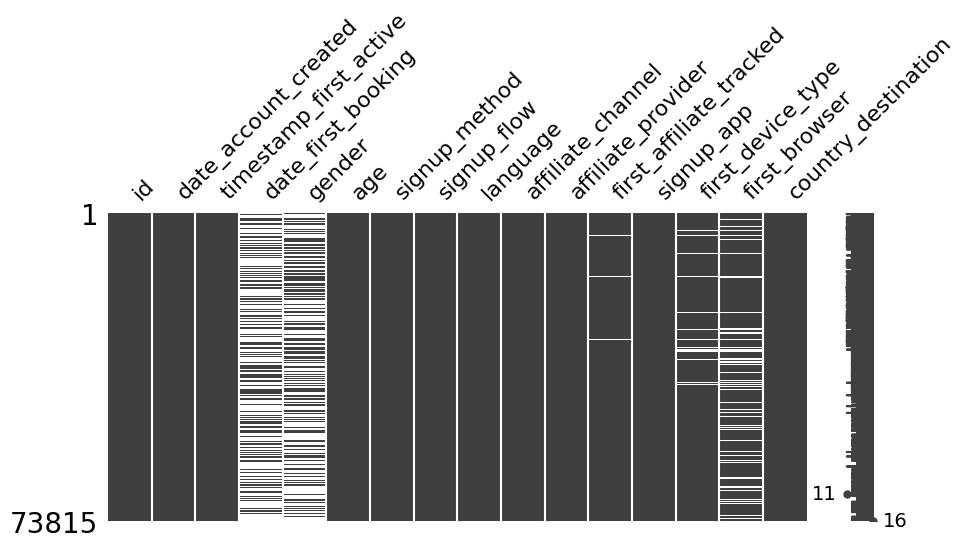

In [ ]:
msno.matrix(df_users, figsize=(10,4))

In [ ]:
df_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
137021,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
137022,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,NaN,-1,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
137023,4grx6yxeby,2014-01-01,2014-01-01 00:16:39,NaT,NaN,-1,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
137024,ncf87guaf0,2014-01-01,2014-01-01 00:21:46,NaT,NaN,-1,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
137025,4rvqpxoh3h,2014-01-01,2014-01-01 00:26:19,2014-01-02,NaN,-1,basic,25,en,direct,direct,untracked,iOS,iPhone,NaN,GB


<Axes: xlabel='date_account_created', ylabel='age'>

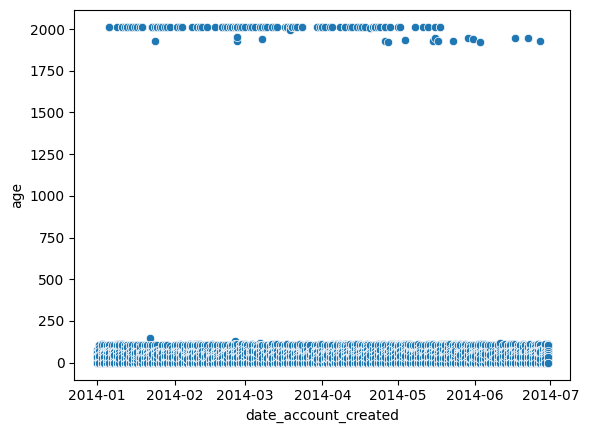

In [ ]:
# 나이분포 확인
sns.scatterplot(data=df_users, x='date_account_created', y='age')
plt.show();

### users 데이터 age 전처리

**나이를 년도로 입력한 경우**
- 에어비엔비 웹사이트를 통해서 가입하는 고객이 년도로 입력한 경우가 많아 웹사이트 가입화면 확인이 필요하다.
- contry_destination 그래프를보면 절반가량은 이용하지 않음
- 년도를 나이로 수정

In [ ]:
# 년도로 입력한 고객
age_year = df_users[df_users['age']>1000]

In [ ]:
# 컬럼별 개수 확인하는 함수
def year_fx(df, column):
    temp = df.groupby([column], as_index=False)[['id']].count().sort_values(by='id', ascending=False)
    return temp

In [ ]:
year_fx(age_year, 'signup_app')

,signup_app,id
2,Web,108
1,Moweb,10
0,Android,7
3,iOS,6


In [ ]:
year_fx(age_year, 'signup_method')

,signup_method,id
0,basic,120
1,facebook,11


In [ ]:
year_fx(age_year, 'country_destination')

,country_destination,id
4,NDF,65
7,US,46
8,other,6
3,IT,4
0,ES,3
1,FR,3
2,GB,2
5,NL,1
6,PT,1


In [ ]:
# 년도를 나이로 변경
age_year = age_year['date_account_created'].dt.year - age_year['age']
age_year_index = age_year.index
df_users.loc[age_year_index,'age'] = age_year

**나이가 100살 이상이거나 0~10살인 경우**
- 위와 마찬가지로 에어비엔비 웹사이트에서 가입한 고객이 대다수인 것으로 나타남
- 절반가량은 이용하지 않았다.

In [ ]:
# 나이를 100살 이상 or  10살 이하 0살 이상
age_100 = df_users[(df_users['age']>100) | ((df_users['age']<=10) & (df_users['age']>=0))]

In [ ]:
year_fx(age_100, 'signup_method')


,signup_method,id
0,basic,574
1,facebook,131


In [ ]:
year_fx(age_100, 'signup_app')

,signup_app,id
2,Web,613
3,iOS,54
1,Moweb,27
0,Android,11


In [ ]:
year_fx(age_100, 'country_destination')

,country_destination,id
7,NDF,298
10,US,267
11,other,64
4,FR,18
6,IT,17
5,GB,14
3,ES,12
1,CA,6
2,DE,3
8,NL,3


In [ ]:
# 부정확한 자료이므로 제거
df_users.drop(age_100.index, axis=0, inplace=True)

C:\Users\eg287\AppData\Local\Temp\ipykernel_14068\715502937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.drop(age_100.index, axis=0, inplace=True)


<Axes: xlabel='date_account_created', ylabel='age'>

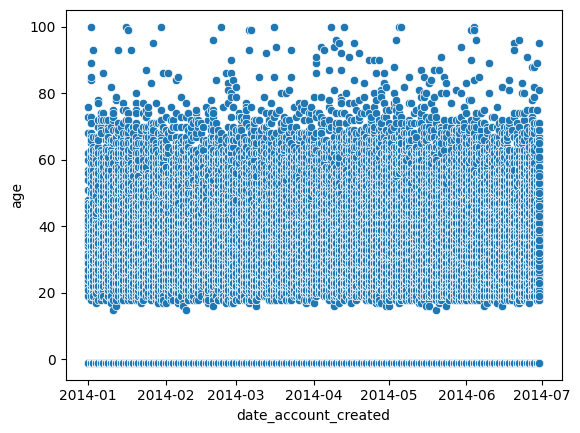

In [ ]:
# 분포 확인(-1은 결측치)
sns.scatterplot(data=df_users, x='date_account_created', y='age')
plt.show()

**나이가 결측치인 경우**
- 마찬가지로 에어비엔비 웹사이트 수정필요

In [ ]:
age_nul = df_users[df_users['age']==-1]

In [ ]:
year_fx(age_nul,'signup_method')

,signup_method,id
0,basic,31206
1,facebook,638
2,google,404


In [ ]:
year_fx(age_nul,'signup_app')

,signup_app,id
2,Web,23936
3,iOS,4546
0,Android,2191
1,Moweb,1575


In [ ]:
year_fx(age_nul,'country_destination')

,country_destination,id
7,NDF,26174
10,US,3812
11,other,948
4,FR,378
6,IT,306
3,ES,182
5,GB,179
1,CA,105
8,NL,53
2,DE,46


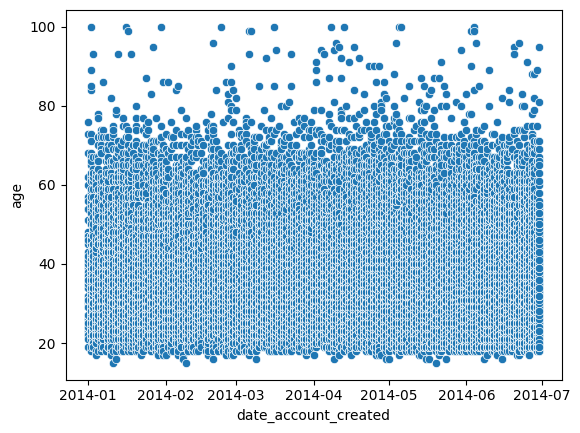

In [ ]:
df_users.drop(age_nul.index, axis=0, inplace=True)
sns.scatterplot(data=df_users, x='date_account_created', y='age')
plt.show()

### users데이터 gender전처리
- 나이와 마찬가지로 에어비엔비 홈페이지에서 결측치가 많이 나옴

In [ ]:
gen_null = df_users[df_users['gender'].isnull()]
gen_null.groupby(['country_destination'], as_index=False)[['id']].count().sort_values(by='id',ascending=False)

,country_destination,id
10,US,3355
7,NDF,2106
11,other,536
4,FR,218
6,IT,140
5,GB,101
3,ES,99
1,CA,71
8,NL,40
2,DE,30


In [ ]:
gen_null.groupby(['signup_method'], as_index=False)[['id']].count().sort_values(by='id',ascending=False)

,signup_method,id
0,basic,6521
1,facebook,149
2,google,47


In [ ]:
# 결측치 제거
df_users.drop(gen_null.index, axis=0, inplace=True)

C:\Users\eg287\AppData\Local\Temp\ipykernel_14068\1072191616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.drop(gen_null.index, axis=0, inplace=True)


### sessions 데이터 전처리

In [ ]:
# 전처리된 users데이터와 같은 id만 뽑기
inter_df = set(df_users['id']).intersection(set(sessions['user_id']))
df_sessions = sessions[sessions['user_id'].isin(inter_df)]

In [ ]:
# 이용시간을 초단위 -> 시간단위로 변경 후 한 페이지에 10시간 이상 있는 경우 제외 
df_sessions['secs_elapsed'] = df_sessions['secs_elapsed']/3600
hour_10 = df_sessions[df_sessions['secs_elapsed']>10]

In [ ]:
df_sessions.drop(hour_10.index, axis=0, inplace=True)
df_sessions

C:\Users\eg287\AppData\Local\Temp\ipykernel_14068\2071311130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sessions.drop(hour_10.index, axis=0, inplace=True)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,0.088611
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,0.083611
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,6.150278
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,0.120833
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,2.139722
...,...,...,...,...,...,...
5554901,zxodksqpep,index,view,view_search_results,Mac Desktop,0.621389
5554903,zxodksqpep,dashboard,view,dashboard,Mac Desktop,0.278056
5554905,zxodksqpep,edit,view,edit_profile,Mac Desktop,0.350278
5554906,zxodksqpep,show,view,user_profile,Mac Desktop,1.081667


In [ ]:
df_sessions.action.unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'decision_tree',
       'recent_reservations', 'faq_experiment_ids', 'multi', 'dashboard',
       'track_page_view', 'show_personalize', 'qt2',
       'request_new_confirm_email', 'ajax_photo_widget_form_iframe',
       'hosting_social_proof', 'ajax_check_dates', 'ajax_lwlb_contact',
       'facebook_auto_login', 'identity', 'confirm_email', 'qt_reply_v2',
       'travel_plans_current', 'complete_status', 'verify', 'create',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'faq', 'active', 'social_connections', 'listings',
       'relationship', 'update', '15', 'collections', 'notifications',
       'campaigns', 'jumio_token', 'login_modal', 'domains',
       'toggle_archived_thread', 'search', 'requested', 'pending',
       'edit_verification', 'aja

In [ ]:
pivot_se = df_sessions.pivot_table(index='action_type',columns='action_detail',values='secs_elapsed',aggfunc=['sum'])
pivot_se

sum                                 
action_detail         -unknown- account_notification_settings   
action_type                                                     
-unknown-         366698.858333                           NaN  \
booking_request             NaN                           NaN   
click                       NaN                           NaN   
data                        NaN                           NaN   
message_post                NaN                           NaN   
partner_callback            NaN                           NaN   
submit                      NaN                           NaN   
view                        NaN                   2190.593056   

                                                                       
action_detail    account_payout_preferences account_privacy_settings   
action_type                                                            
-unknown-                               NaN                      NaN  \
booking_request                         NaN                      NaN   
click                                   NaN                      NaN   
data                                    NaN                      NaN   
message_post                            NaN                      NaN   
partner_callback                        NaN                      NaN   
submit                                  NaN                      NaN   
view                            2244.926667               436.437222   

                                                               
action_detail    account_transaction_history admin_templates   
action_type                                                    
-unknown-                                NaN             NaN  \
booking_request                          NaN             NaN   
click                                    NaN             NaN   
data                                     NaN         46.7725   
message_post                             NaN             NaN   
partner_callback                         NaN             NaN   
submit                                   NaN             NaN   
view                              708.596667             NaN   

                                                                              
action_detail    airbnb_picks_wishlists alteration_field alteration_request   
action_type                                                                   
-unknown-                           NaN              NaN                NaN  \
booking_request                     NaN              NaN                NaN   
click                               NaN       132.155556                NaN   
data                                NaN              NaN                NaN   
message_post                        NaN              NaN                NaN   
partner_callback                    NaN              NaN                NaN   
submit                              NaN              NaN                NaN   
view                          50.257222              NaN          18.643056   

                               ...                                              
action_detail    apply_coupon  ... user_tax_forms user_wishlists view_listing   
action_type                    ...                                              
-unknown-                 NaN  ...            NaN            NaN          NaN  \
booking_request           NaN  ...            NaN            NaN          NaN   
click                     NaN  ...            NaN            NaN          NaN   
data                      NaN  ...     480.333889            NaN          NaN   
message_post              NaN  ...            NaN            NaN          NaN   
partner_callback          NaN  ...            NaN            NaN          NaN   
submit            7652.497778  ...            NaN            NaN          NaN   
view                      NaN  ...            NaN   51859.843889  1045.456667   

                                                    